
Descarga imágenes Sentinel-2 con las librerías SentinelSat de Python
==============


## Librería SentinelSat

SentinelSat facilita la búsqueda y la descarga de las imágenes de satélite Sentinel del repositorio Copernicus Open Access Hub.

### Iniciar sesión

En primer lugar cargamos las librerías que vamos a utilizar y configuramos las credenciales de la API.

In [ ]:
from sentinelsat import SentinelAPI, placename_to_wkt
from shapely.geometry import Polygon
from datetime import date
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

api = SentinelAPI('jon_mikel', '786B8usa2022', 'https://apihub.copernicus.eu/apihub')

### Definir región y tiempo de interés

Generamos un BoundingBox para delimitar la zona de interés. Empleamos el objeto "Polygon" para generar el rectángulo correspondiente al BoundingBox.
También definimos el rango de fechas en el que queremos realizar la búsqueda.

In [3]:
lat_min = 42.53
lon_min = -1.98
lat_max = 42.54
lon_max = -1.97
poly = Polygon([(lon_min, lat_max), (lon_max, lat_max), (lon_max, lat_min), (lon_min, lat_min)])

date_range = (date(2022, 7, 1), date(2022, 7, 30))

### Búsqueda de imágenes

A partir de la región y tiempo de interés, filtramos los productos publicados en SciHub.
También se define un rango de nubosidad, que a lo máximo será del 50%, y un límite de 6 productos.

In [36]:
footprint = poly.wkt
bbox_products = api.query(footprint,
                     date = date_range,
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0, 50),
                     limit = 6)

Mostramos los productos filtrados. Tenemos 6 productos que corresponden a la misma región, pero de fechas distintas.

Podemos comprobar que todos los productos corresponden a la misma región, observando que todos tienen la misma geometría.

In [42]:
products_gdf = api.to_geodataframe(bbox_products)
blankIndex=[''] * len(products_gdf)
products_gdf.index=blankIndex
pd.set_option('display.max_colwidth', 120) 
products_gdf[['generationdate', 'geometry']]

,generationdate,geometry
,2022-07-27 12:39:49,"MULTIPOLYGON (((-1.66699 42.35632, -1.64554 43.34483, -3.00024 43.35286, -3.00024 42.36407, -1.66699 42.35632)))"
,2022-07-27 11:44:39,"MULTIPOLYGON (((-1.66699 42.35632, -1.64554 43.34483, -3.00024 43.35286, -3.00024 42.36407, -1.66699 42.35632)))"
,2022-07-17 12:35:55,"MULTIPOLYGON (((-1.66699 42.35632, -1.64554 43.34483, -3.00024 43.35286, -3.00024 42.36407, -1.66699 42.35632)))"
,2022-07-17 11:46:15,"MULTIPOLYGON (((-1.66699 42.35632, -1.64554 43.34483, -3.00024 43.35286, -3.00024 42.36407, -1.66699 42.35632)))"
,2022-07-12 21:31:38,"MULTIPOLYGON (((-1.66699 42.35632, -1.64554 43.34483, -3.00024 43.35286, -3.00024 42.36407, -1.66699 42.35632)))"
,2022-07-12 14:39:48,"MULTIPOLYGON (((-1.66699 42.35632, -1.64554 43.34483, -3.00024 43.35286, -3.00024 42.36407, -1.66699 42.35632)))"


### Descarga de imágenes

Descargamos de imágenes mediante el comando 'download_all_quicklooks', las cuales se almacenan en la ruta especificada.

In [ ]:
api.download_all_quicklooks(bbox_products, 'images/bbox')

### Mostrar de imágenes descargadas

Mostramos las imágenes descargadas, correspondientes a los 6 productos de SciHub filtrados.

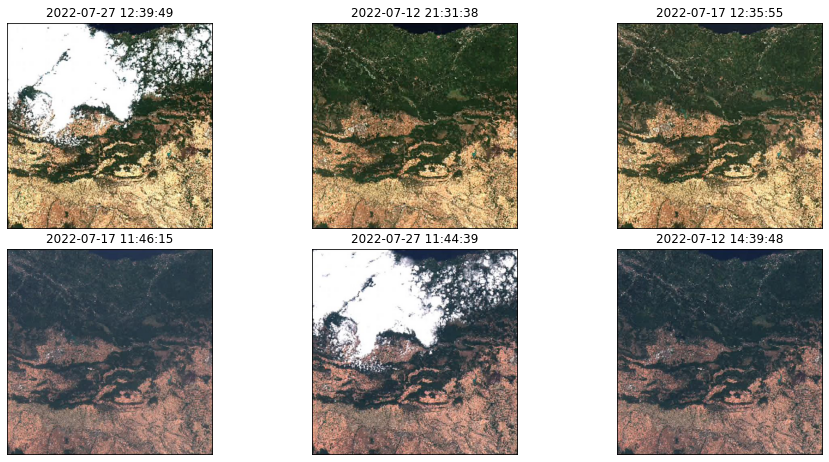

In [43]:
def mostrarImagenes(products: gpd.GeoDataFrame, path: str):

    indexes = pd.Series([0, 1, 2, 3, 4, 5])
    products = products.set_index(indexes)
    f, axarr = plt.subplots(2,3, figsize=(15, 15))

    for index, row in products.iterrows():
        i = index % 2
        j = index - (3 * int(index > 2))
        img = plt.imread(path + row['title'] + ".jpeg")
        axarr[i,j].set_title(row['generationdate'])
        axarr[i,j].axis('off')
        axarr[i,j].imshow(img)
    
    plt.subplots_adjust(left=0.1, 
                        bottom=0.1, 
                        right=0.9, 
                        top=0.5, 
                        wspace=0.2, 
                        hspace=0.1)

    plt.show()

mostrarImagenes(products_gdf, "images/bbox/")

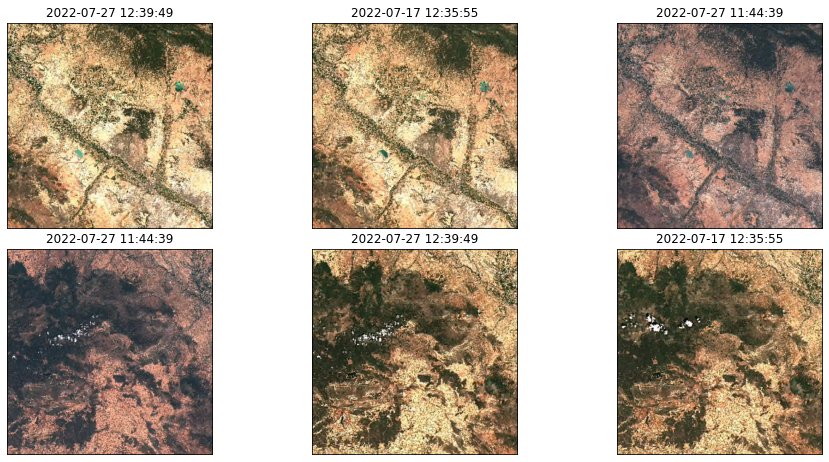

In [47]:
tudela_products = api.query(placename_to_wkt("Tudela")[0],
                     date = date_range,
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0, 50),
                     limit = 6)

tudela_gdf = api.to_geodataframe(tudela_products)

api.download_all_quicklooks(tudela_products, 'images/tudela/')

mostrarImagenes(tudela_gdf, "images/tudela/")